In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import shuffle

from jupyterthemes import jtplot
jtplot.style()

In [12]:
data = pd.read_excel('mysocial-chap2.xlsx')
data

,Friend,Max Temp,Weight,Height,Gender,Company
0,Andrew,25,77,175,M,Good
1,Bernhard,31,110,195,M,Good
2,Carolina,15,70,172,F,Bad
3,Dennis,20,85,180,M,Good
4,Eve,10,65,168,F,Bad
5,Fred,12,75,173,M,Good
6,Gwyneth,16,75,180,F,Bad
7,Hayden,26,63,165,F,Bad
8,Irene,15,55,158,F,Bad
9,James,21,66,163,M,Good


In [22]:
data_s = data.loc[:, ['Weight', 'Height']]
data_s

,Weight,Height
0,77,175
1,110,195
2,70,172
3,85,180
4,65,168
5,75,173
6,75,180
7,63,165
8,55,158
9,66,163


# K-means

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

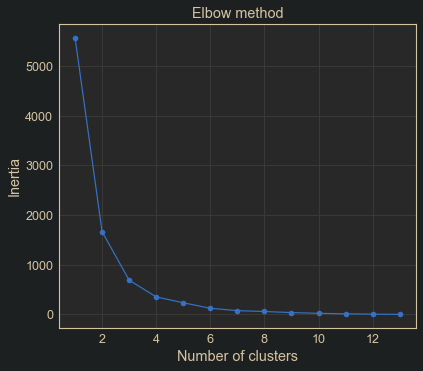

In [23]:
inertias = []

for i in range(1,14):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(data_s)
    inertias.append(kmeans.inertia_)
    
    
plt.plot(range(1,14), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


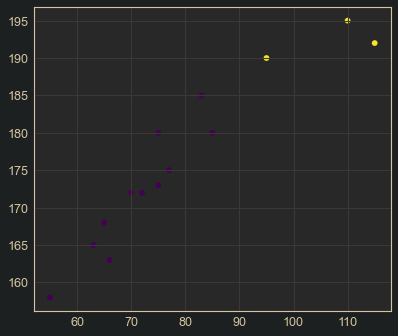

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_s)

plt.scatter(data_s['Weight'], data_s['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


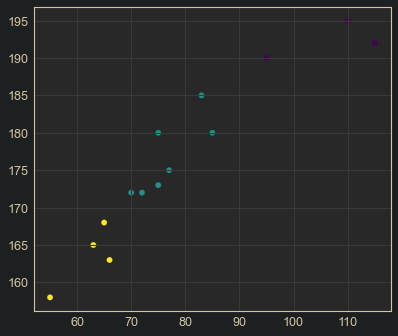

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_s)

plt.scatter(data_s['Weight'], data_s['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


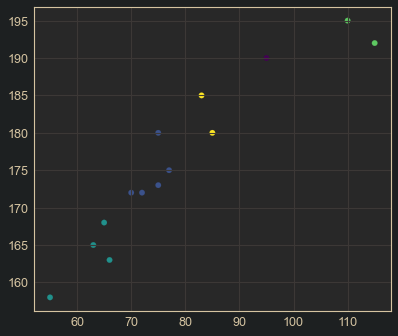

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_s)

plt.scatter(data_s['Weight'], data_s['Height'], c=kmeans.labels_)
plt.show()

# K-NN

To determine the optimal ε parameter, I will compute the k-nearest neighbor (kNN) distances 
(average distance of every data point to its k-nearest neighbors) of an input dataset using the 
k-nearest neighbor method (unsupervised nearest neighbors learning). For finding the k-nearest neighbor,I will use the sklearn.neighbors.NearestNeighbors function.

NearestNeighbors function requires n_neighbors (number of neighbors) parameter, which can be same as the minPts value.

The minPts parameter is easy to set. The minPts should be 4 for two-dimensional dataset. For 
multidimensional dataset, minPts should be 2 * number of dimensions. For example, if your dataset has 6 
features, set minPts = 12.

In our case minPts = 4



# DBSCAN

In [112]:
# n_neighbors = 4, as kneighbors function returns distance of point to itself 
# (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors=4).fit(data_s)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data_s)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)


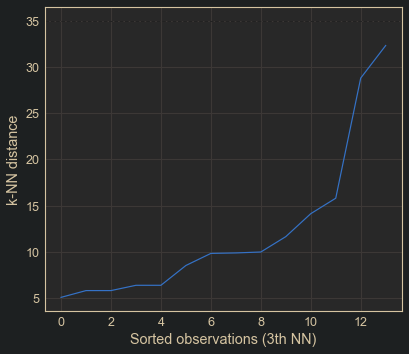

In [113]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.axhline(y=35, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (3th NN)")
plt.show()

In [118]:
clusters = DBSCAN(eps=10, min_samples=4).fit(data_s)
# get cluster labels
clusters.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1],
      dtype=int64)

In [115]:
# check unique clusters
set(clusters.labels_)

{-1, 0}

In [116]:
# get each cluster size
Counter(clusters.labels_)

Counter({0: 8, -1: 6})

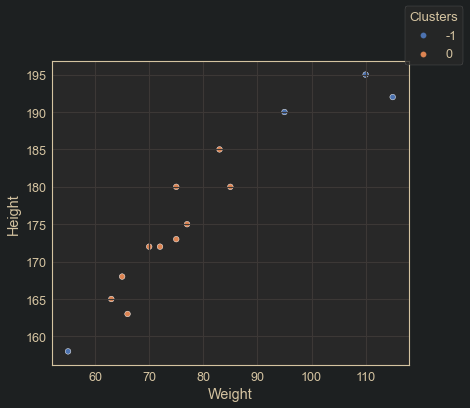

In [119]:
p = sns.scatterplot(data=data_s, x="Weight", y="Height", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [120]:
clusters = DBSCAN(eps=7, min_samples=4).fit(data_s)
# get cluster labels
clusters.labels_

array([ 0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1],
      dtype=int64)

In [121]:
set(clusters.labels_)

{-1, 0}

In [122]:
Counter(clusters.labels_)

Counter({0: 8, -1: 6})

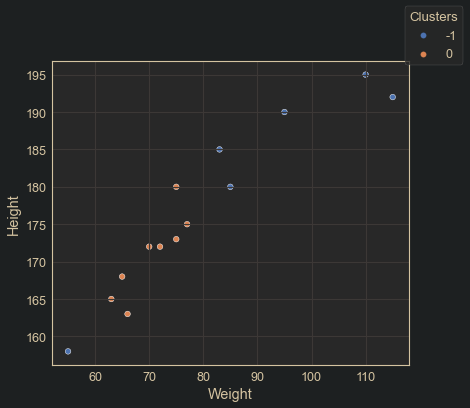

In [123]:
p = sns.scatterplot(data=data_s, x="Weight", y="Height", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

First point near origin does not belong to any cluster. It's too far away to be considered.

# Dendogram

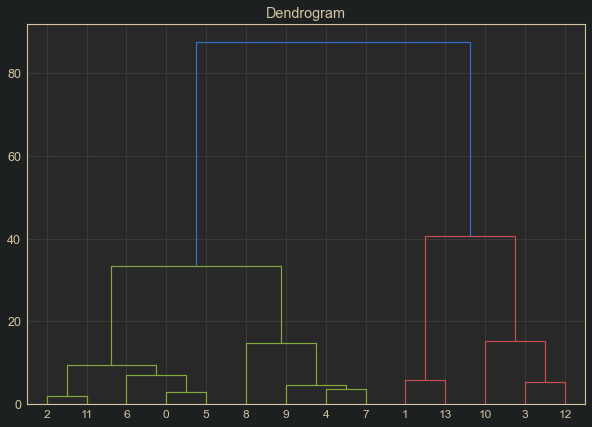

In [63]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')

linkage_method = linkage(data_s, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

# Agglomerative Clustering

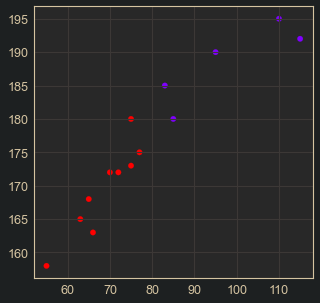

In [65]:
cluster_ea = AgglomerativeClustering(n_clusters=2, linkage='ward',affinity='euclidean')

# Visualizing the clustering
plt.figure(figsize =(5, 5))
plt.scatter(data_s['Weight'], data_s['Height'], c = cluster_ea.fit_predict(data_s),cmap='rainbow')
plt.show()

## Now lets repeat using normalized data:

In [71]:
data_n = preprocessing.normalize(data_s, axis=0)
scaled_data = pd.DataFrame(data_n, columns=('Weight', 'Height'))
scaled_data

,Weight,Height
0,0.254830,0.264812
1,0.364043,0.295076
2,0.231664,0.260272
3,0.281306,0.272378
4,0.215116,0.254219
5,0.248211,0.261785
6,0.248211,0.272378
7,0.208497,0.249680
8,0.182021,0.239087
9,0.218426,0.246653


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

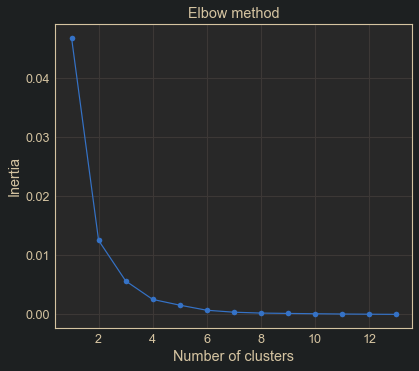

In [75]:
inertias = []

for i in range(1,14):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    
    
plt.plot(range(1,14), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


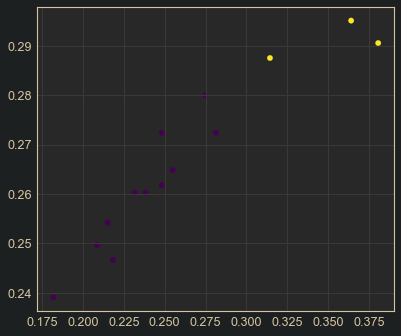

In [76]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

plt.scatter(scaled_data['Weight'], scaled_data['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


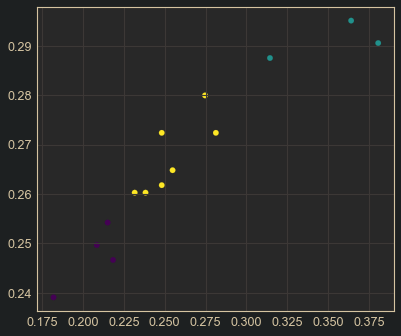

In [103]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

plt.scatter(scaled_data['Weight'], scaled_data['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


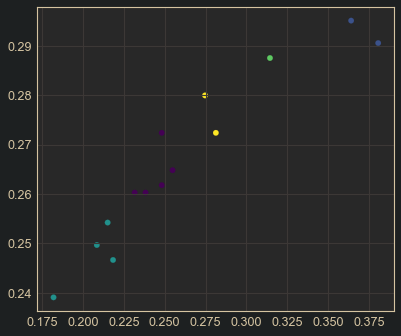

In [104]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)

plt.scatter(scaled_data['Weight'], scaled_data['Height'], c=kmeans.labels_)
plt.show()

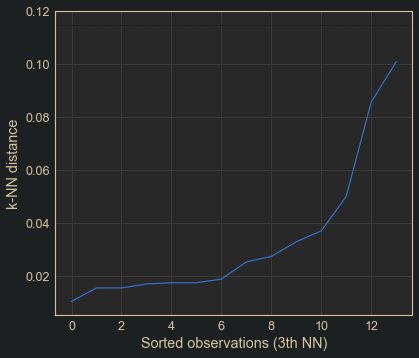

In [98]:
nbrs = NearestNeighbors(n_neighbors=4).fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.axhline(y=0.115, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (3th NN)")
plt.show()

In [96]:
clusters = DBSCAN(eps=0.03, min_samples=3).fit(scaled_data)
# get cluster labels
clusters.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1],
      dtype=int64)

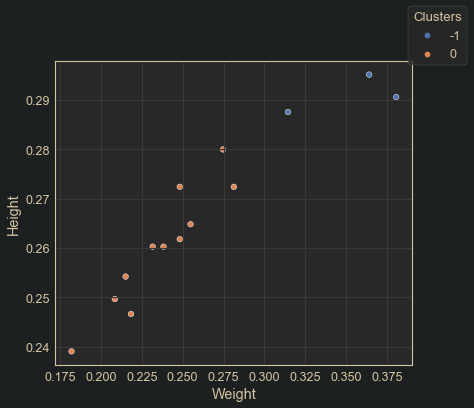

In [97]:
p = sns.scatterplot(data=scaled_data, x="Weight", y="Height", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

With normalized data (normalized distances), the DBSCAN is able to cluster all the points.

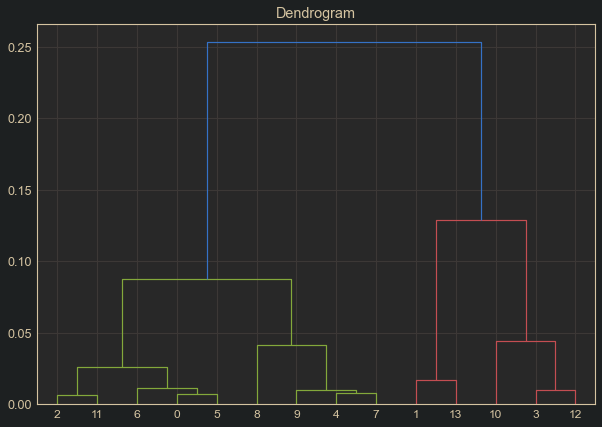

In [100]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')

linkage_method = linkage(scaled_data, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method)

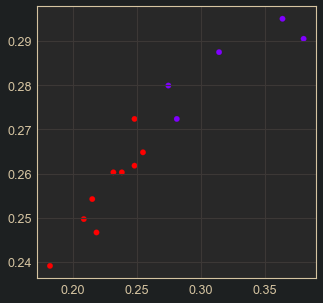

In [102]:
cluster_ea = AgglomerativeClustering(n_clusters=2, linkage='ward',affinity='euclidean')

# Visualizing the clustering
plt.figure(figsize =(5, 5))
plt.scatter(scaled_data['Weight'], scaled_data['Height'], c = cluster_ea.fit_predict(scaled_data),cmap='rainbow')
plt.show()

## What happends if you change the **order** you present the data to k-means ?

In [130]:
shuffled_s = shuffle(data_s, random_state=1)
shuffled_n = shuffle(scaled_data, random_state=1)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


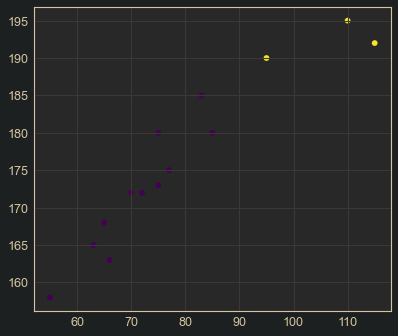

In [136]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(shuffled_s)

plt.scatter(shuffled_s['Weight'], shuffled_s['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


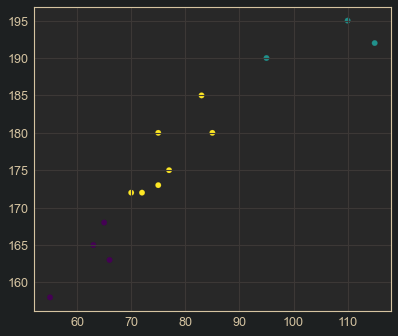

In [128]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(shuffled_s)

plt.scatter(shuffled_s['Weight'], shuffled_s['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


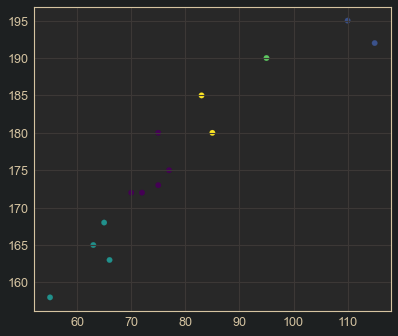

In [129]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(shuffled_s)

plt.scatter(shuffled_s['Weight'], shuffled_s['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


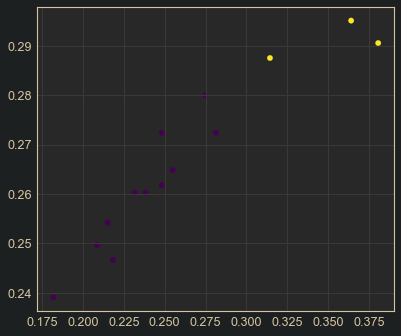

In [131]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(shuffled_n)

plt.scatter(shuffled_n['Weight'], shuffled_n['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


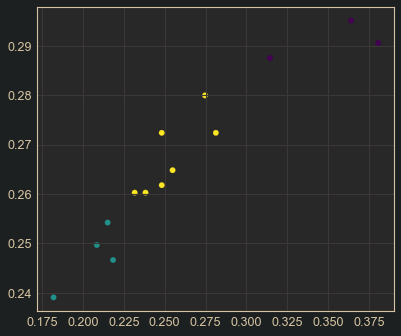

In [132]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(shuffled_n)

plt.scatter(shuffled_n['Weight'], shuffled_n['Height'], c=kmeans.labels_)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


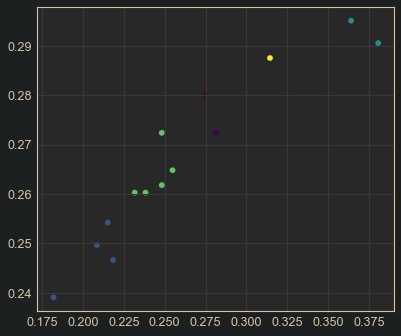

In [133]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(shuffled_n)

plt.scatter(shuffled_n['Weight'], shuffled_n['Height'], c=kmeans.labels_)
plt.show()

k-means in not sensitive to sample randomization,, as expected.